In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import wavio
import IPython

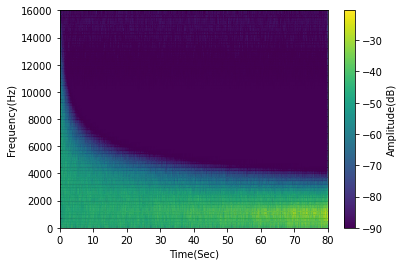

In [2]:
sr = 32000

wav = wavio.read("LAVA-VERB.wav")

left_channel = wav.data[:, 0]
left_channel = left_channel.astype(np.float32, order='C') / 32767.0
left_channel = left_channel * 4

f, t, Wxx = signal.stft(left_channel, sr, nperseg = 128)

x = t
y = f
Z = 20 * np.log10(np.abs(Wxx))
z_max = Z.max()

fig, ax = plt.subplots()
ax.set_xlabel("Time(Sec)")
ax.set_ylabel("Frequency(Hz)")
c = ax.pcolormesh(x, y, Z, shading='gouraud', vmin = -90, vmax = z_max)
plt.colorbar(c, label="Amplitude(dB)")

plt.show()

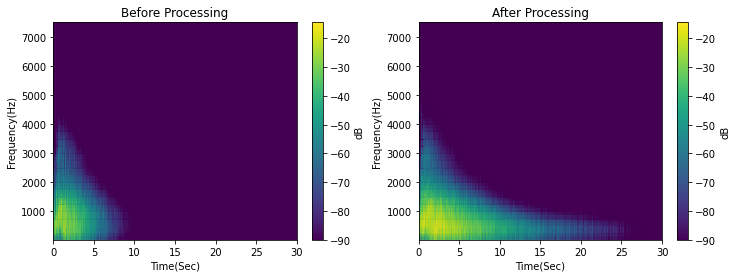

In [3]:
sr = 32000

wav = wavio.read("A Hornet Pillow.wav")
original = wav.data[:, 0]
original = original.astype(np.float32, order='C') / 32767.0

wav = wavio.read("A Hornet Pillow_render.wav")
render = wav.data[:, 0]
render = render.astype(np.float32, order='C') / 32767.0
render = render * 2

f0, t0, Wxx0 = signal.stft(original, sr, nperseg = 128)
f1, t1, Wxx1 = signal.stft(render, sr, nperseg = 128)

Z0 = 20 * np.log10(np.abs(Wxx0))
Z1 = 20 * np.log10(np.abs(Wxx1))

z_max = Z0.max()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_ylim(20, 7500)
ax[0].set_xlabel("Time(Sec)")
ax[0].set_ylabel("Frequency(Hz)")

ax[1].set_ylim(20, 7500)
ax[1].set_xlabel("Time(Sec)")
ax[1].set_ylabel("Frequency(Hz)")

c = ax[0].pcolormesh(t0, f0, Z0, shading='gouraud', vmin=-90, vmax=z_max)
fig.colorbar(c, ax=ax[0], label="dB")
ax[0].set_title("Before Processing")

c = ax[1].pcolormesh(t1, f1, Z1, shading='gouraud', vmin=-90, vmax=z_max)
fig.colorbar(c, ax=ax[1], label="dB")
ax[1].set_title("After Processing")

plt.show()